In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT, COMPLEX_MOVEMENT, RIGHT_ONLY

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
#env = JoypadSpace(env, COMPLEX_MOVEMENT)

In [3]:
# create a flag - restart or not
done = True
for step in range(10000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

## Preprocess Enviroment

!pip install torch torchvision

!pip install stable-baselines3[extra]

In [6]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [7]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [8]:
state = env.reset()

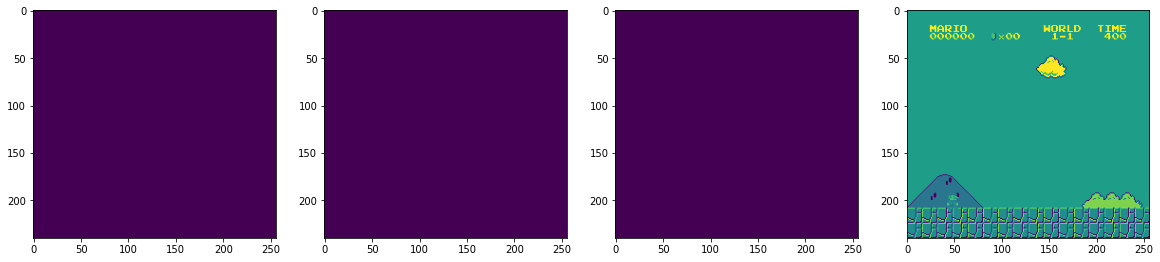

In [9]:
plt.figure(figsize=(20, 16))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3.Train the RL Model

In [10]:
import os 
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [11]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [12]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [13]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [14]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_1
----------------------------
| time/              |     |
|    fps             | 4   |
|    iterations      | 1   |
|    time_elapsed    | 104 |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 2             |
|    time_elapsed         | 152           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 6.0545048e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.000459     |
|    learning_rate        | 1e-06         |
|    loss                 | 201           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000375     |
|    value_loss           | 454           |
-------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 11           |
|    iterations           | 13           |
|    time_elapsed         | 580          |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 2.032367e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00244     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0575       |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.000449    |
|    value_loss           | 0.195        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 14            |
|    time_elapsed         | 614           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 24            |
|    time_elapsed         | 961           |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 1.3739336e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.266         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.114         |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000105     |
|    value_loss           | 0.535         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 25           |
|    time_elapsed         | 996     

------------------------------------------
| time/                   |              |
|    fps                  | 1            |
|    iterations           | 35           |
|    time_elapsed         | 9424         |
|    total_timesteps      | 17920        |
| train/                  |              |
|    approx_kl            | 9.520585e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.207        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.088        |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.000193    |
|    value_loss           | 1.5          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1             |
|    iterations           | 36            |
|    time_elapsed         | 9459          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 46           |
|    time_elapsed         | 9838         |
|    total_timesteps      | 23552        |
| train/                  |              |
|    approx_kl            | 3.194739e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0716       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0991       |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.000305    |
|    value_loss           | 0.245        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 2             |
|    iterations           | 47            |
|    time_elapsed         | 9880          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 2             |
|    iterations           | 57            |
|    time_elapsed         | 10260         |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 2.4395995e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.321         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.156         |
|    n_updates            | 560           |
|    policy_gradient_loss | -0.000276     |
|    value_loss           | 0.368         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 58           |
|    time_elapsed         | 10296   

In [ ]:
model.save('thisisatestmodel')